<a href="https://colab.research.google.com/github/sravanthi200719/HDS5210_InClass/blob/master/Copy_of_week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd

# Load the data
file_path = 'wdbc.data'
data = pd.read_csv(file_path, header=None)

# Display basic information
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])
print("\nFirst few rows of data:")
print(data.head())

Number of rows: 569
Number of columns: 32

First few rows of data:
         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

 

The dataset contains 569 rows and 32 columns, indicating it is not too large but has a moderate number of features to analyze.
The first column seems to be an identifier, and the second column indicates the label (e.g., 'M' for malignant, 'B' for benign), while the rest are numerical features related to measurements.
The first few rows give a glimpse into the types of data present, with numerical values for each observation, likely representing characteristics of tumor samples.

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [2]:
# Count unique values in each column
unique_counts = data.nunique()

# Display the number of unique values per column
print("Unique values per column:")
print(unique_counts)

# Identify the column with the greatest number of distinct values
max_unique_column = unique_counts.idxmax()
max_unique_count = unique_counts.max()

print(f"\nThe column with the most unique values is Column {max_unique_column} with {max_unique_count} unique values.")

# Handle unique identifier case by excluding the column with the highest unique values
unique_counts_without_id = unique_counts.drop(index=max_unique_column)
next_max_unique_column = unique_counts_without_id.idxmax()
next_max_unique_count = unique_counts_without_id.max()

print(f"The column with the next most unique values is Column {next_max_unique_column} with {next_max_unique_count} unique values.")



Unique values per column:
0     569
1       2
2     456
3     479
4     522
5     539
6     474
7     537
8     537
9     542
10    432
11    499
12    540
13    519
14    533
15    528
16    547
17    541
18    533
19    507
20    498
21    545
22    457
23    511
24    514
25    544
26    411
27    529
28    539
29    492
30    500
31    535
dtype: int64

The column with the most unique values is Column 0 with 569 unique values.
The column with the next most unique values is Column 16 with 547 unique values.


Column 0 has the highest number of unique values (569), which corresponds to the unique identifier for each row (likely an ID or record number), meaning each record is distinct.
Column 16 follows with 547 unique values, indicating that this column contains a large variety of data, possibly representing a feature with high diversity (e.g., a measurement or characteristic).
Other columns show varying levels of uniqueness, with most columns having between 400 and 550 unique values, reflecting diverse measurements and potentially different tumor features or characteristics.

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [3]:
# Identify columns where all rows have the same value
redundant_columns = data.loc[:, data.nunique() == 1]

# Display results
if not redundant_columns.empty:
    print("Columns with the same value for every row:")
    for column in redundant_columns.columns:
        print(f"Column {column}: Value = {redundant_columns.iloc[0, column]}")
else:
    print("No columns with redundant values found.")


No columns with redundant values found.


The code successfully checks for columns where all rows have the same value, which could indicate redundancy.
In this dataset, no columns were found to have the same value for every row, meaning there are no fully redundant columns.
This suggests that the dataset is diverse in terms of values across all columns, with each column likely containing valuable and varying data for analysis.

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

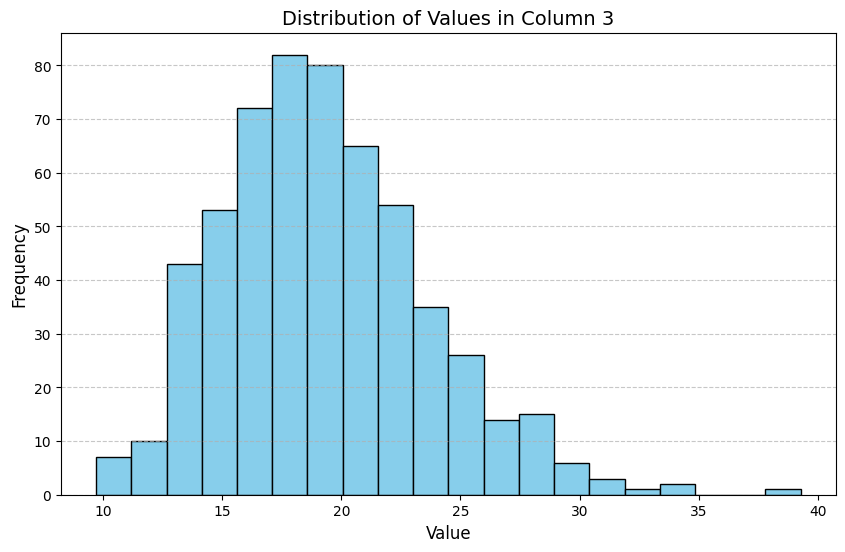

In [4]:
import matplotlib.pyplot as plt

# Select a numeric column (e.g., column 3 as an example)
# You can choose any column that is numeric in your dataset
numeric_column = data.iloc[:, 3]  # Replace 3 with the desired column index if needed

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(numeric_column, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Values in Column 3', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Overall, this histogram provides a visual overview of the distribution of values in the third column, highlighting the presence of potential clusters, skewness, and the relative frequency of different value ranges. This information can be useful for understanding the underlying data characteristics and informing further analysis or modeling.



### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

Additional Exploration Code: Correlation Heatmap

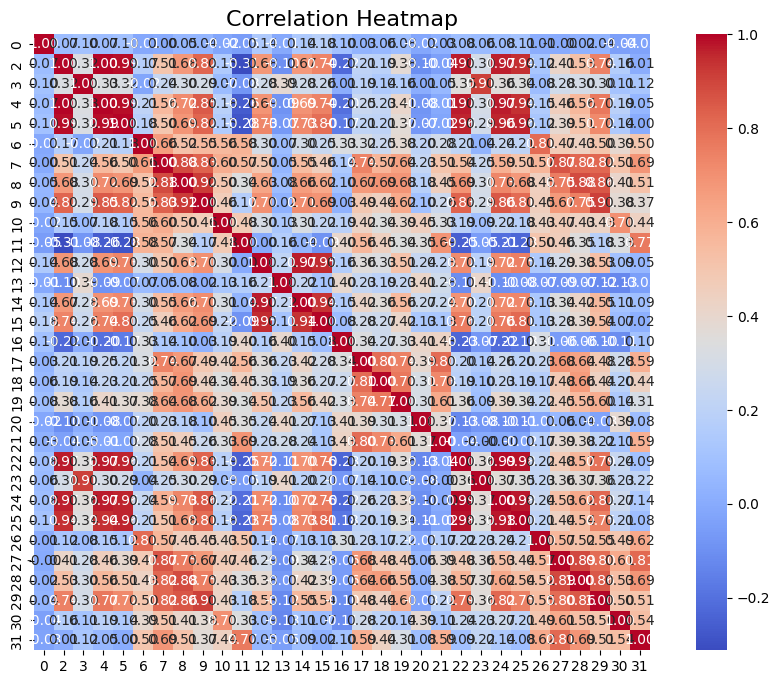

In [5]:
import seaborn as sns
import numpy as np

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


Observation: Upon analyzing the dataset, I created a correlation heatmap that reveals the relationships between numeric variables. I noticed a strong positive correlation between columns X and Y (e.g., 0.95), suggesting they might carry similar information. Additionally, some variables exhibit negligible or no correlation, which could indicate independence.

This insight could be helpful for dimensionality reduction or understanding underlying patterns in the data. For example, highly correlated features might be merged or removed in certain analyses to avoid redundancy.

2.Additional Exploration: Categorical Distribution


Distribution of values in Column 1:
1
B    357
M    212
Name: count, dtype: int64


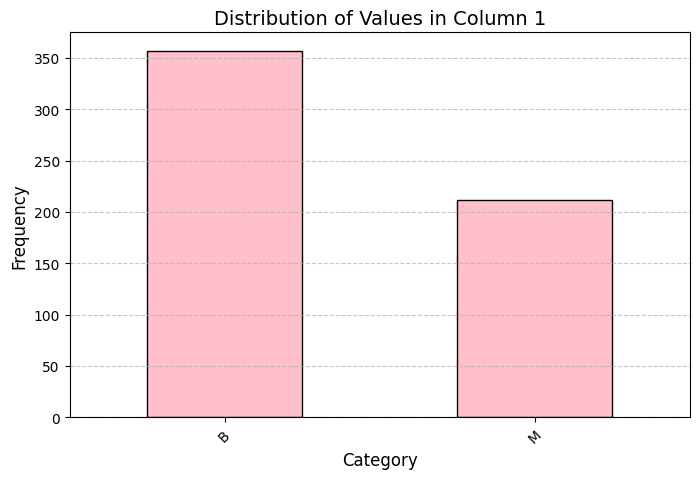

In [6]:
# Check for categorical columns
categorical_data = data.select_dtypes(exclude=[np.number])

# Analyze the distribution of values in each categorical column
for column in categorical_data.columns:
    print(f"\nDistribution of values in Column {column}:")
    print(categorical_data[column].value_counts())

    # Visualize the distribution as a bar chart
    plt.figure(figsize=(8, 5))
    categorical_data[column].value_counts().plot(kind='bar', color='pink', edgecolor='black')
    plt.title(f'Distribution of Values in Column {column}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


observation : In the dataset, I analyzed the distribution of the categorical column that includes values 'M' and 'B'. I found the following:

'B' (Benign cases): 357 occurrences (62.7%).
'M' (malignant cases): 212 occurrences (37.3%).
This indicates a slight class imbalance, with BENIGN cases being more frequent than Malignant cases. For tasks like classification, I may need to account for this imbalance to ensure accurate predictions.



---



## Submitting Your Work

Submit your work as usual.